In [1]:
import requests
from dotenv import load_dotenv
import yfinance as yf
import hvplot.pandas
import alpaca_trade_api as tradeapi
import pandas as pd
import numpy as np
import seaborn as sns

import panel as pn
import plotly.express as px
import matplotlib.pyplot as plt
from pathlib import Path
import panel.widgets as pnw
from panel.interact import interact
import panel as pn
from panel import widgets
import plotly.express as px
pn.extension('plotly')

In [2]:
load_dotenv()

True

In [3]:
ticker_list = ['^GSPC','^IXIC','MSCI','ETH-USD','BCH-USD','BTC-USD','ADA-USD','DASH-USD','LTC-USD']

In [4]:
def tickerListGrab(ticker_list, period="5y"):
    #create empty DataFrame
    df_price = pd.DataFrame()
    df_return = pd.DataFrame()
    #loop through list
    for ticker in ticker_list:
        out = [0]
        # get data from Yahoo Finance
        symbol = yf.Ticker(ticker)
        symbol_hist = symbol.history(period=period)
        # drop unnecessary columns
        symbol_hist = symbol_hist.drop(["Dividends","Stock Splits"],axis = 1)
        # drop NA
        symbol_hist = symbol_hist.dropna()
        # sort data by Date(ascending)
        symbol_hist = symbol_hist.sort_index(ascending=True)
        # calculate return for each symbol
        for i in range(len(symbol_hist)-1):
            out.append((symbol_hist['Close'][i+1]-symbol_hist['Close'][i])/symbol_hist['Close'][i])
        symbol_hist['Return'] = out
        # labeling
#        symbol_hist['Name'] = ticker
        # append to the main DataFrame
        df_price = pd.concat([df_price,symbol_hist['Close']],axis=1)
        df_return = pd.concat([df_return,symbol_hist['Return']],axis=1)
        df_price = df_price.rename(columns={'Close':ticker+'_Close'})
        df_return = df_return.rename(columns={'Return':ticker+'_Return'})
        #df_price = df_price.sort_index(ascending=False)
        #df_return = df_return.sort_index(ascending=False)
#        symbol_hist.to_csv(f"{ticker}_hist.csv")
        # dropna
    df_price = df_price.dropna()
    df_return = df_return.dropna()
    return df_price,df_return

In [5]:
df_price,df_return = tickerListGrab(ticker_list)

In [6]:
df_price.tail()

^GSPC_Close   ^IXIC_Close  MSCI_Close  ETH-USD_Close  \
2021-05-27  4200.879883  13736.280273  464.369995    2736.488525   
2021-05-28  4204.109863  13748.740234  468.130005    2419.906250   
2021-06-01  4202.040039  13736.480469  461.970001    2633.518311   
2021-06-02  4208.120117  13756.330078  468.869995    2706.125000   
2021-06-03  4192.850098  13614.506836  461.980011    2819.857666   

            BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  DASH-USD_Close  \
2021-05-27     745.955078   38436.968750       1.645960      203.325684   
2021-05-28     689.947876   35697.605469       1.511987      183.186523   
2021-06-01     691.403870   36684.925781       1.734753      191.512054   
2021-06-02     697.912964   37575.179688       1.752824      202.535812   
2021-06-03     712.942688   38797.175781       1.823207      207.273270   

            LTC-USD_Close  
2021-05-27     193.121094  
2021-05-28     177.320663  
2021-06-01     182.980698  
2021-06-02     187.263977  
2021-06-03     189.632935

In [7]:
crypto_df=df_price.drop(["^GSPC_Close","^IXIC_Close","MSCI_Close"], axis=1)
crypto_df.head()

ETH-USD_Close  BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  \
2017-10-02     297.475006     421.186005    4409.319824       0.025932   
2017-10-03     292.463013     404.177002    4317.479980       0.020816   
2017-10-04     292.657990     358.446991    4229.359863       0.021931   
2017-10-05     295.863007     355.750000    4328.410156       0.021489   
2017-10-06     308.588013     363.014008    4370.810059       0.018539   

            DASH-USD_Close  LTC-USD_Close  
2017-10-02      308.684998      53.375999  
2017-10-03      296.234985      52.349602  
2017-10-04      305.457001      51.399502  
2017-10-05      305.398987      51.669498  
2017-10-06      306.878998      52.120098

In [8]:
stock_df=df_price.drop(["ETH-USD_Close","BCH-USD_Close","BTC-USD_Close","ADA-USD_Close","DASH-USD_Close","LTC-USD_Close"], axis=1)
stock_df.head()

^GSPC_Close  ^IXIC_Close  MSCI_Close
2017-10-02  2529.120117  6516.720215  112.523842
2017-10-03  2534.580078  6531.709961  113.995552
2017-10-04  2537.739990  6534.629883  115.563446
2017-10-05  2552.070068  6585.359863  116.486870
2017-10-06  2549.330078  6590.180176  116.660034

In [9]:
df_price.head()

^GSPC_Close  ^IXIC_Close  MSCI_Close  ETH-USD_Close  \
2017-10-02  2529.120117  6516.720215  112.523842     297.475006   
2017-10-03  2534.580078  6531.709961  113.995552     292.463013   
2017-10-04  2537.739990  6534.629883  115.563446     292.657990   
2017-10-05  2552.070068  6585.359863  116.486870     295.863007   
2017-10-06  2549.330078  6590.180176  116.660034     308.588013   

            BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  DASH-USD_Close  \
2017-10-02     421.186005    4409.319824       0.025932      308.684998   
2017-10-03     404.177002    4317.479980       0.020816      296.234985   
2017-10-04     358.446991    4229.359863       0.021931      305.457001   
2017-10-05     355.750000    4328.410156       0.021489      305.398987   
2017-10-06     363.014008    4370.810059       0.018539      306.878998   

            LTC-USD_Close  
2017-10-02      53.375999  
2017-10-03      52.349602  
2017-10-04      51.399502  
2017-10-05      51.669498  
2017-10-06      52.120098

In [10]:
df_return.head()

^GSPC_Return  ^IXIC_Return  MSCI_Return  ETH-USD_Return  \
2017-10-02      0.003874      0.003196     0.000685       -0.016081   
2017-10-03      0.002159      0.002300     0.013079       -0.016848   
2017-10-04      0.001247      0.000447     0.013754        0.000667   
2017-10-05      0.005647      0.007763     0.007991        0.010951   
2017-10-06     -0.001074      0.000732     0.001487        0.043010   

            BCH-USD_Return  BTC-USD_Return  ADA-USD_Return  DASH-USD_Return  \
2017-10-02        0.014534        0.001267        0.038568        -0.022536   
2017-10-03       -0.040384       -0.020829       -0.197285        -0.040332   
2017-10-04       -0.113144       -0.020410        0.053565         0.031131   
2017-10-05       -0.007524        0.023420       -0.020154        -0.000190   
2017-10-06        0.020419        0.009796       -0.137280         0.004846   

            LTC-USD_Return  
2017-10-02       -0.021401  
2017-10-03       -0.019230  
2017-10-04       -0.018149  
2017-10-05        0.005253  
2017-10-06        0.008721

In [11]:
df_price.hvplot.line(title = 'Index and Crypto Price')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [12]:
df_return.hvplot.line(title = 'Index and Crypto Return')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

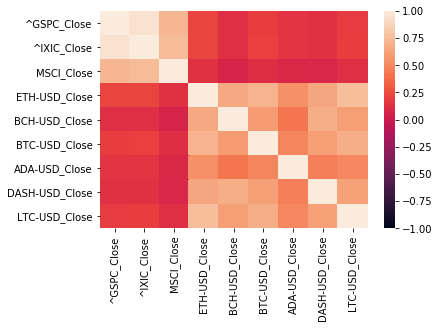

In [13]:
full_df_heatmap = df_price.pct_change().corr()
sns.heatmap(full_df_heatmap, vmin=-1, vmax=1)

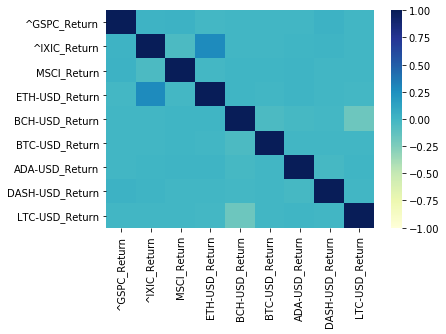

In [14]:
heat = df_return.pct_change().corr()
sns.heatmap(heat, vmin=-1, vmax=1,cmap="YlGnBu")

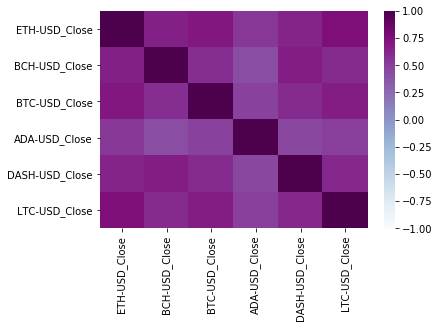

In [15]:
crypto_heatmap=crypto_df.pct_change().corr()
sns.heatmap(crypto_heatmap, vmin=-1,vmax=1,cmap="BuPu")

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')

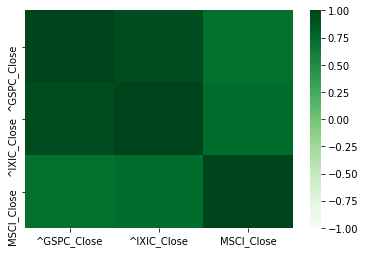

In [17]:
stock_heatmap=stock_df.pct_change().corr()
sns.heatmap(stock_heatmap,vmin=-1,vmax=1,cmap="Greens")

In [18]:
annual_returns = df_price.pct_change().mean()*252
annual_returns

^GSPC_Close       0.162296
^IXIC_Close       0.231766
MSCI_Close        0.449055
ETH-USD_Close     1.140182
BCH-USD_Close     1.024604
BTC-USD_Close     0.910316
ADA-USD_Close     2.365241
DASH-USD_Close    0.554801
LTC-USD_Close     0.938191
dtype: float64

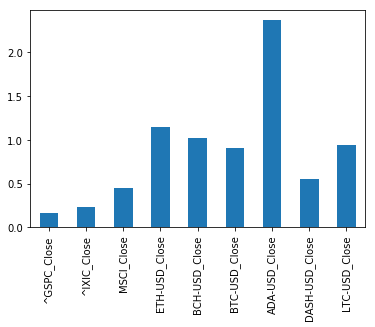

In [19]:
annual_returns.plot(kind = 'bar')

In [20]:
data_annualreturns = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_annualreturns, x='year', y='pop')
fig.show()

In [21]:
daily_returns = df_price.pct_change()

In [22]:
#rolling volatility 
##crypto looks like a roller-coaster.

daily_returns.rolling(200).std() * np.sqrt(200)
daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [32]:
crypto_daily_returns.rolling(200).std() * np.sqrt(200)
crypto_daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [33]:
stock_daily_returns.rolling(200).std() * np.sqrt(200)
stock_daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [34]:
daily_returns.head()

^GSPC_Close  ^IXIC_Close  MSCI_Close  ETH-USD_Close  \
2017-10-02          NaN          NaN         NaN            NaN   
2017-10-03     0.002159     0.002300    0.013079      -0.016848   
2017-10-04     0.001247     0.000447    0.013754       0.000667   
2017-10-05     0.005647     0.007763    0.007991       0.010951   
2017-10-06    -0.001074     0.000732    0.001487       0.043010   

            BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  DASH-USD_Close  \
2017-10-02            NaN            NaN            NaN             NaN   
2017-10-03      -0.040384      -0.020829      -0.197285       -0.040332   
2017-10-04      -0.113144      -0.020410       0.053565        0.031131   
2017-10-05      -0.007524       0.023420      -0.020154       -0.000190   
2017-10-06       0.020419       0.009796      -0.137280        0.004846   

            LTC-USD_Close  
2017-10-02            NaN  
2017-10-03      -0.019230  
2017-10-04      -0.018149  
2017-10-05       0.005253  
2017-10-06       0.008721

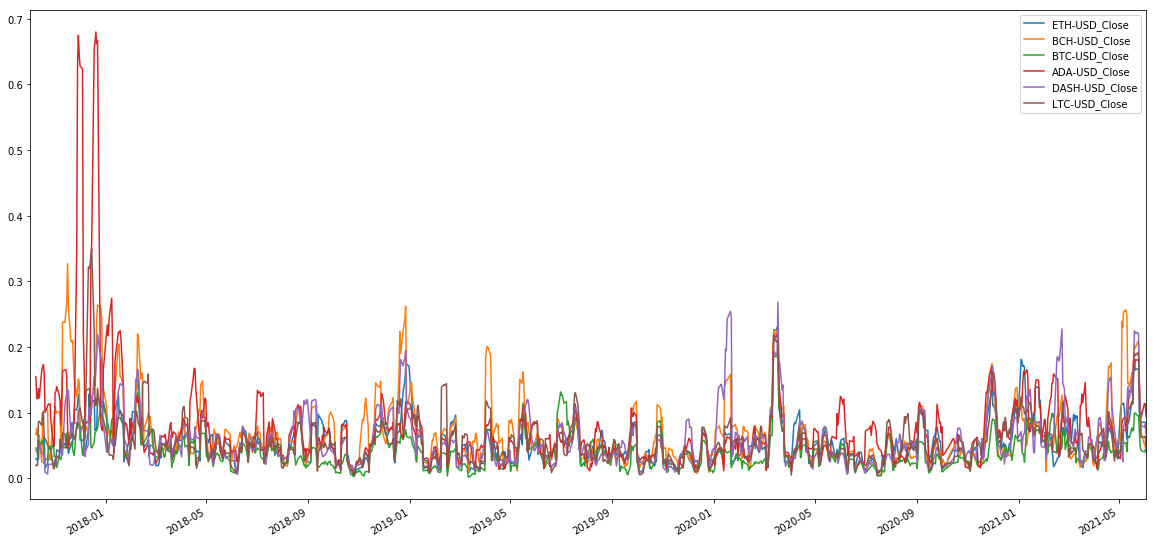

In [36]:
crypto_daily_returns.rolling(5).std().plot(figsize=(20,10))

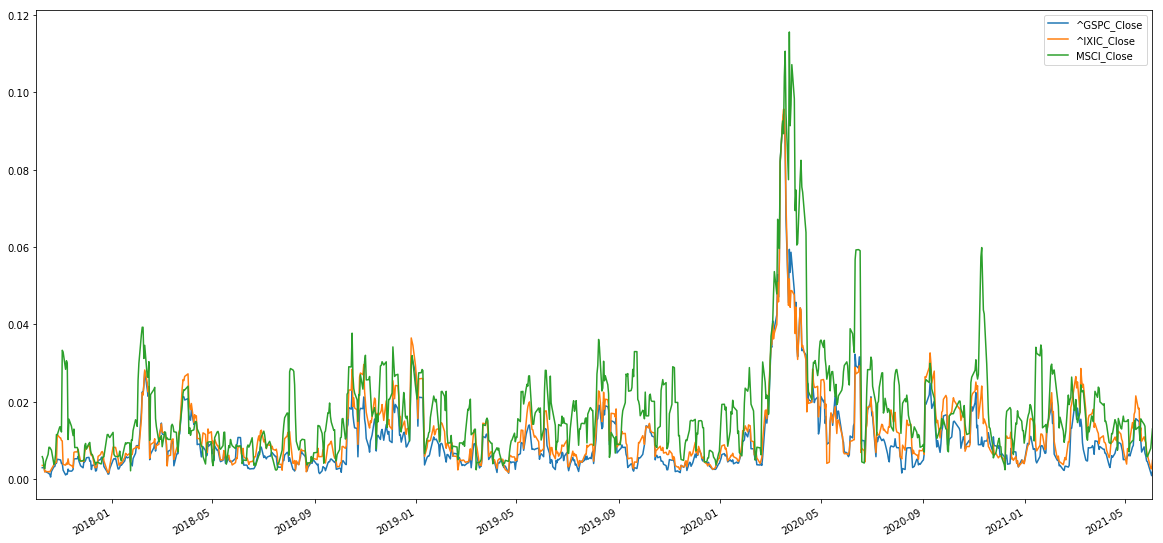

In [37]:
stock_daily_returns.rolling(5).std().plot(figsize=(20,10))

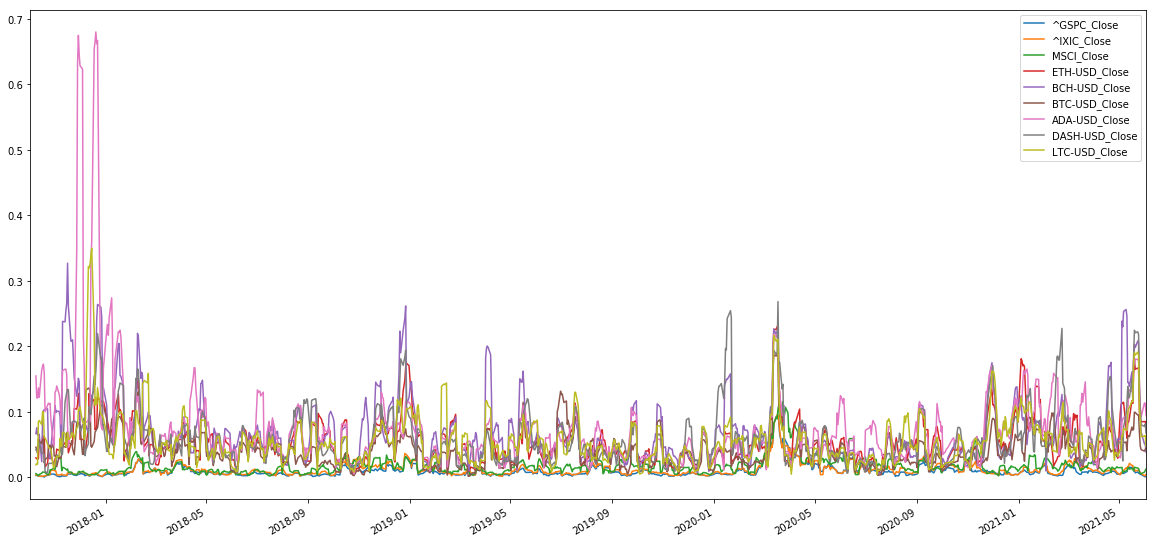

In [38]:
daily_returns.rolling(5).std().plot(figsize=(20,10))
#Add sliding variable? (Days)

### Covariance

Covariance tells us the relationship between the variables. We are trying to find if there is a linear relationship between assets.

For example, if bitcoin gains 5%, how do the returns of sp500 correspond to it? Does it also gain 5%? Or does it show no response to it? That is one way to think about covariance. Let’s see their annual 

In [39]:
annual_cov = daily_returns.cov() * 252
annual_cov

corr = annual_cov.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

In [40]:
annual_crypto_cov=crypto_daily_returns.cov() * 252
annual_crypto_cov

corr = annual_crypto_cov.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

In [41]:
annual_stock_cov=stock_daily_returns.cov() * 252
annual_stock_cov

corr = annual_stock_cov.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

* The variance of sp500 is 0.036586. The variance of bitcoin is 0.5960695. 
* The covariance between bitcoin and sp500 is 0.024520 At this point in time, we can only tell that a positive covariance value means there is a positive linear relationship. 

However, it does not tell us anything about the gradient of the slope or the strength of the 
relationship. In order to do so, we need to calculate the correlation.

### Correlation
* Correlation tells us how strong a relationship between the variables is. 
* The values are between -1 to 1. 
* A value of -1 means it is perfectly negatively correlated. 0 means no correlation and 1 means perfectly positively correlated.


In [42]:
daily_returns.corr()

^GSPC_Close  ^IXIC_Close  MSCI_Close  ETH-USD_Close  \
^GSPC_Close        1.000000     0.948107    0.725750       0.222062   
^IXIC_Close        0.948107     1.000000    0.743202       0.223210   
MSCI_Close         0.725750     0.743202    1.000000       0.139712   
ETH-USD_Close      0.222062     0.223210    0.139712       1.000000   
BCH-USD_Close      0.130040     0.125441    0.069355       0.659104   
BTC-USD_Close      0.195194     0.201174    0.121091       0.706788   
ADA-USD_Close      0.152414     0.152507    0.087567       0.545623   
DASH-USD_Close     0.138455     0.138605    0.082608       0.641324   
LTC-USD_Close      0.185251     0.192243    0.126499       0.762871   

                BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  DASH-USD_Close  \
^GSPC_Close          0.130040       0.195194       0.152414        0.138455   
^IXIC_Close          0.125441       0.201174       0.152507        0.138605   
MSCI_Close           0.069355       0.121091       0.087567        0.082608   
ETH-USD_Close        0.659104       0.706788       0.545623        0.641324   
BCH-USD_Close        1.000000       0.594604       0.422601        0.682646   
BTC-USD_Close        0.594604       1.000000       0.496957        0.604849   
ADA-USD_Close        0.422601       0.496957       1.000000        0.466421   
DASH-USD_Close       0.682646       0.604849       0.466421        1.000000   
LTC-USD_Close        0.608256       0.686779       0.507579        0.620299   

                LTC-USD_Close  
^GSPC_Close          0.185251  
^IXIC_Close          0.192243  
MSCI_Close           0.126499  
ETH-USD_Close        0.762871  
BCH-USD_Close        0.608256  
BTC-USD_Close        0.686779  
ADA-USD_Close        0.507579  
DASH-USD_Close       0.620299  
LTC-USD_Close        1.000000

* Correlation between sp500 and bitcoin is 0.166047 or 16.6%, which is a low correlation. 
* Note that we are comparing the correlation between the assets’ returns rather than the price movement.
* Another thing is that we don’t multiply by 252 trading days. This is because there is no average daily correlation value here. We are just trying to find out the correlation between both assets across the entire data set.

Is it surprising to see such a low correlation? Well, the earlier two price chart says it all. sp500 returns (stocks) pale in comparison to bitcoin (crpyto), drastically.

You might ask, why do we need to calculate the covariance or correlation?

This is because the volatility of one’s portfolio depends on three things.

1. The standard deviation of the individual assets
2. Weight of the assets
3. Covariance between the assets

Hence, the covariance value is one of the inputs that we need to calculate portfolio volatility. The lower the covariance between the two assets, the lower the volatility. This is because they do not move in tandem. Generally speaking, a portfolio of assets that have a high correlation or covariance between one another usually has higher volatility.

### Volatility

* Volatility tells us the riskiness of an asset
* The values are based on percentage of high risk. 
* The wider the tower on the histogram, the more volatile the asset will be.

In [43]:
crypto_volatility = crypto_daily_returns.std() * 252**.5
crypto_volatility

ETH-USD_Close     1.019287
BCH-USD_Close     1.348423
BTC-USD_Close     0.786903
ADA-USD_Close     1.741333
DASH-USD_Close    1.163361
LTC-USD_Close     1.110696
dtype: float64

* Crypto portfolio shows that BTC is the least volatile compared to the other crypto assets.

In [ ]:
# Volatility Histogram

In [47]:
name = pnw.MultiSelect(options=list(crypto_daily_returns.columns.values))
ax = crypto_daily_returns.hvplot.hist(y=name,bins=75,alpha=0.6,bin_range=(-0.3, 0.3),ylim=(0,800))
pn.Row(pn.WidgetBox(name), ax)

#We can see the volatility level of the crypto assets based on the wideness of the histogram

Row
    [0] WidgetBox
        [0] MultiSelect(options=['ETH-USD_Close', ...])
    [1] ParamFunction(function)

In [45]:
name = pnw.MultiSelect(options=list(daily_returns.columns.values))
ax = stock_daily_returns.hvplot.hist(y=name,bins=75,alpha=0.6,bin_range=(-0.3, 0.3),ylim=(0,800))
pn.Row(pn.WidgetBox(name), ax)

Row
    [0] WidgetBox
        [0] MultiSelect(options=['^GSPC_Close', ...])
    [1] ParamFunction(function)

In [46]:
name = pnw.MultiSelect(options=list(daily_returns.columns.values))
ax = daily_returns.hvplot.hist(y=name,bins=75,alpha=0.6,bin_range=(-0.3, 0.3),ylim=(0,800))
pn.Row(pn.WidgetBox(name), ax)

#We can plot out the price returns on a histogram chart. The wider the distribution the more volatile it is. 
#You can see that sp500 is mostly within the mean distribution. But cardano spreads widely across the x-axis. Sometimes 
#the returns can be 10%,15% or 20%. But you will never see a day sp500 up 15%.

Row
    [0] WidgetBox
        [0] MultiSelect(options=['^GSPC_Close', ...])
    [1] ParamFunction(function)

In [ ]:
stock_volatility = stock_daily_returns.std() * 252**.5
stock_volatility

* Stock portfolio shows to be much less risky and volatile. showing around 24-35% volatility

In [ ]:
full_volatility = daily_returns.std() * 252**.5
full_volatility

* The full portfolio shows that the volatility of the selected assets are diversified showing crypto assets as the most volatile assets in the portfolio

In [ ]:
daily_returns.ewm(halflife=21).mean().head(20)

The objective goal of Team1 is to help assist you to determine appropriate weights of stocks and crpto in your portfolio.

The folowiing will tell you where the Sharpe ratio is the highest. That is the point where the adjusted-risk return is the maximum. We will use the following analysis to tell us the weights of the assets at this particular point.

In [ ]:
## Find Sharpe Ratio for Crypto, Stock and full portfolio  - X
## Find Correlation of each portfolio  - X
## Find Volatility for each portfolio   - X
## Find Covariance for each portfolio   - X

In [25]:
port_sharpe_ratio=daily_returns.mean() / daily_returns.std()
port_sharpe_ratio.hvplot.bar(color="green",title="Full Portfolio Sharpe Ratio")

:Bars   [index]   (0)

In [26]:
crypto_daily_returns=crypto_df.pct_change()
crypto_daily_returns.head()

ETH-USD_Close  BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  \
2017-10-02            NaN            NaN            NaN            NaN   
2017-10-03      -0.016848      -0.040384      -0.020829      -0.197285   
2017-10-04       0.000667      -0.113144      -0.020410       0.053565   
2017-10-05       0.010951      -0.007524       0.023420      -0.020154   
2017-10-06       0.043010       0.020419       0.009796      -0.137280   

            DASH-USD_Close  LTC-USD_Close  
2017-10-02             NaN            NaN  
2017-10-03       -0.040332      -0.019230  
2017-10-04        0.031131      -0.018149  
2017-10-05       -0.000190       0.005253  
2017-10-06        0.004846       0.008721

In [27]:
crypto_sharpe_ratio=crypto_daily_returns.mean() / crypto_daily_returns.std()
crypto_sharpe_ratio.head

<bound method NDFrame.head of ETH-USD_Close     0.070466
BCH-USD_Close     0.047866
BTC-USD_Close     0.072874
ADA-USD_Close     0.085564
DASH-USD_Close    0.030042
LTC-USD_Close     0.053210
dtype: float64>

In [28]:
crypto_sharpe_ratio.hvplot.bar(color="gold", title="Crypto Portfolio Sharpe Ratio")

:Bars   [index]   (0)

In [29]:
stock_daily_returns=stock_df.pct_change()
stock_daily_returns.head()

^GSPC_Close  ^IXIC_Close  MSCI_Close
2017-10-02          NaN          NaN         NaN
2017-10-03     0.002159     0.002300    0.013079
2017-10-04     0.001247     0.000447    0.013754
2017-10-05     0.005647     0.007763    0.007991
2017-10-06    -0.001074     0.000732    0.001487

In [30]:
stock_sharpe_ratio=stock_daily_returns.mean() / stock_daily_returns.std()
stock_sharpe_ratio.head()

^GSPC_Close    0.047169
^IXIC_Close    0.060135
MSCI_Close     0.080518
dtype: float64

In [31]:
stock_sharpe_ratio.hvplot.bar(color="blue",title="Stock Portfolio Sharpe Ratio")

:Bars   [index]   (0)

In [53]:
iterations = 1000
results = np.zeros((5,iterations))
results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
weighted_portfolio = df_price[['^IXIC_Close','ADA-USD_Close']]
weighted_portfolio.head()

^IXIC_Close  ADA-USD_Close
2017-10-02  6516.720215       0.025932
2017-10-03  6531.709961       0.020816
2017-10-04  6534.629883       0.021931
2017-10-05  6585.359863       0.021489
2017-10-06  6590.180176       0.018539

In [55]:
weighted_annual_returns = weighted_portfolio.pct_change().mean() * 252
weighted_annual_returns

^IXIC_Close      0.231766
ADA-USD_Close    2.365241
dtype: float64

In [56]:
#assets = weighted_portfolio[['nasdaq price','cardano price']]
assets = ['^IXIC_Close','ADA-USD_Close']
assets

['^IXIC_Close', 'ADA-USD_Close']

In [57]:
weighted_daily_returns = weighted_portfolio.pct_change()
weighted_daily_returns.head()

^IXIC_Close  ADA-USD_Close
2017-10-02          NaN            NaN
2017-10-03     0.002300      -0.197285
2017-10-04     0.000447       0.053565
2017-10-05     0.007763      -0.020154
2017-10-06     0.000732      -0.137280

In [58]:
weighted_annual_cov = weighted_daily_returns.cov() * 252
weighted_annual_cov

^IXIC_Close  ADA-USD_Close
^IXIC_Close       0.058946       0.064476
ADA-USD_Close     0.064476       3.032241

In [59]:
for i in range(iterations):
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)
    
    portfolio_return = np.dot(weighted_annual_returns, weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(weighted_annual_cov, weights)))
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = results[0,i] / results[1,i]
    results[3,i] = weights[0]
    results[4,i] = weights[1]

In [60]:
weighted_results = pd.DataFrame(results.T,columns=['returns','stdev','sharpe','^IXIC','ADA-USD'])
weighted_results.sort_values(by='returns')

returns     stdev    sharpe     ^IXIC   ADA-USD
136  0.235671  0.242849  0.970444  0.998170  0.001830
752  0.241351  0.243012  0.993165  0.995507  0.004493
104  0.244754  0.243152  1.006592  0.993912  0.006088
97   0.250840  0.243477  1.030241  0.991060  0.008940
68   0.258774  0.244050  1.060335  0.987341  0.012659
15   0.259342  0.244097  1.062454  0.987075  0.012925
985  0.260879  0.244230  1.068171  0.986354  0.013646
343  0.262879  0.244411  1.075560  0.985417  0.014583
94   0.264979  0.244613  1.083258  0.984432  0.015568
50   0.286191  0.247296  1.157280  0.974490  0.025510
269  0.291009  0.248066  1.173112  0.972232  0.027768
735  0.294020  0.248577  1.182814  0.970820  0.029180
667  0.304287  0.250488  1.214778  0.966008  0.033992
723  0.309801  0.251621  1.231222  0.963423  0.036577
482  0.314584  0.252663  1.245073  0.961182  0.038818
340  0.314795  0.252710  1.245675  0.961083  0.038917
992  0.315302  0.252824  1.247121  0.960845  0.039155
57   0.319185  0.253717  1.258038  0.959025  0.040975
229  0.326831  0.255578  1.278795  0.955441  0.044559
389  0.330132  0.256422  1.287453  0.953894  0.046106
163  0.335729  0.257912  1.301720  0.951271  0.048729
497  0.337181  0.258310  1.305337  0.950590  0.049410
297  0.338836  0.258769  1.309415  0.949815  0.050185
332  0.341702  0.259578  1.316373  0.948471  0.051529
361  0.346301  0.260915  1.327257  0.946315  0.053685
204  0.346627  0.261011  1.328015  0.946163  0.053837
703  0.347248  0.261196  1.329455  0.945871  0.054129
464  0.347654  0.261317  1.330393  0.945681  0.054319
295  0.348786  0.261656  1.332994  0.945151  0.054849
506  0.350590  0.262203  1.337097  0.944305  0.055695
..        ...       ...       ...       ...       ...
350  2.273593  1.668152  1.362941  0.042958  0.957042
948  2.274391  1.668790  1.362899  0.042583  0.957417
167  2.279508  1.672873  1.362630  0.040185  0.959815
347  2.282221  1.675039  1.362488  0.038913  0.961087
853  2.283011  1.675670  1.362447  0.038543  0.961457
747  2.288330  1.679915  1.362170  0.036050  0.963950
738  2.289767  1.681063  1.362095  0.035376  0.964624
806  2.292909  1.683571  1.361932  0.033904  0.966096
959  2.304934  1.693171  1.361312  0.028267  0.971733
689  2.306185  1.694169  1.361248  0.027681  0.972319
465  2.317401  1.703125  1.360676  0.022424  0.977576
585  2.322622  1.707294  1.360411  0.019977  0.980023
719  2.323816  1.708247  1.360351  0.019417  0.980583
82   2.327140  1.710901  1.360183  0.017859  0.982141
981  2.330044  1.713220  1.360037  0.016498  0.983502
377  2.334668  1.716913  1.359805  0.014330  0.985670
541  2.338524  1.719993  1.359613  0.012523  0.987477
268  2.341075  1.722031  1.359485  0.011327  0.988673
131  2.343793  1.724201  1.359350  0.010053  0.989947
108  2.344753  1.724968  1.359302  0.009603  0.990397
944  2.346614  1.726454  1.359210  0.008731  0.991269
67   2.346764  1.726574  1.359203  0.008661  0.991339
794  2.347648  1.727280  1.359159  0.008246  0.991754
991  2.349014  1.728371  1.359091  0.007606  0.992394
746  2.351524  1.730376  1.358967  0.006430  0.993570
286  2.354891  1.733066  1.358801  0.004851  0.995149
83   2.356456  1.734315  1.358724  0.004118  0.995882
421  2.358328  1.735811  1.358632  0.003240  0.996760
838  2.360896  1.737862  1.358506  0.002037  0.997963
801  2.362533  1.739169  1.358426  0.001270  0.998730

[1000 rows x 5 columns]

* The highest return is 231% with a 99.8% weight in Cardano. 

However, that also means the portfolio volatility is 174%, which is extremly risky. On the other hand, the lowest return is 23.3% with a 99.8% weight in nasdaq. The volatility is only 21.6%.

Plotting out all the data points of 1000 different weight combinations, we can find out the exact point where the Sharpe ratio is the highest.

### The Sharpe ratio is the point where the adjusted-risk return is the highest.

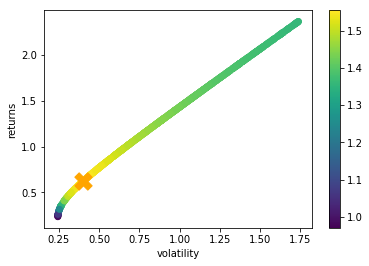

In [61]:
max_sharpe = weighted_results.iloc[weighted_results['sharpe'].idxmax()]

plt.scatter(weighted_results.stdev,weighted_results.returns,c=weighted_results.sharpe)
plt.xlabel('volatility')
plt.ylabel('returns')
plt.colorbar()

plt.scatter(max_sharpe[1],max_sharpe[0],marker="X",color='orange',s=300)

In [62]:
print(max_sharpe)

returns    0.625831
stdev      0.402552
sharpe     1.554657
^IXIC      0.815295
ADA-USD    0.184705
Name: 360, dtype: float64


The optimal weight based on the past 5-years price returns, statistics, modern portfolio theories, mathematics, and previous anaylsis is 86% nasdaq and 14% cardano. This weighted allocation would give an average return of about 53%. 
The volatility is about 33%. You achieve higher returns with exposure to cardano (crypto), but your risk is also mitigated by having a heavier weight in nasdaq (stocks).

In [63]:
msci_weight=max_sharpe[3]
msci_weight

0.8152945493657797

In [64]:
cardano_weight=max_sharpe[4]
cardano_weight

0.18470545063422023

In [65]:
msci_weight + cardano_weight

1.0

In [66]:
highest_stock_crypto = df_price[['MSCI_Close', 'ADA-USD_Close']]
highest_stock_crypto.head()

MSCI_Close  ADA-USD_Close
2017-10-02  112.523842       0.025932
2017-10-03  113.995552       0.020816
2017-10-04  115.563446       0.021931
2017-10-05  116.486870       0.021489
2017-10-06  116.660034       0.018539

In [68]:
highest_stock_crypto.columns=pd.MultiIndex.from_tuples(map(lambda x: (x[1], 'close'), highest_stock_crypto.columns))
highest_stock_crypto.head()

close          
                 close     close
2017-10-02  112.523842  0.025932
2017-10-03  113.995552  0.020816
2017-10-04  115.563446  0.021931
2017-10-05  116.486870  0.021489
2017-10-06  116.660034  0.018539

In [69]:
from MCForecastTools import MCSimulation

ModuleNotFoundError: No module named 'MCForecastTools'

In [ ]:
mc_fiveyear = MCSimulation(highest_stock_crypto, [msci_weight,cardano_weight], 500, 252*5)
mc_fiveyear.portfolio_data.head()

In [ ]:
mc_fiveyear.calc_cumulative_return()

In [ ]:
mc_fiveyear.simulated_return.mean(axis=1)

In [ ]:
mc_fiveyear.simulated_return.median(axis=1)

In [ ]:
mc_fiveyear.simulated_return.min(axis=1)

In [ ]:
mc_fiveyear.simulated_return.max(axis=1)

In [ ]:
mc_fiveyear.plot_simulation()

In [ ]:
mc_fiveyear.plot_distribution()

In [ ]:
mc_fiveyear.summarize_cumulative_return()

In [ ]:
ci_lower = mc_fiveyear.summarize_cumulative_return()[8]
ci_upper = mc_fiveyear.summarize_cumulative_return()[9]
initial_investment = 1000
ci_lower_dollar = ci_lower*initial_investment
ci_upper_dollar = ci_upper*initial_investment

In [ ]:
f"there is 95% chance that my intital investment of {initial_investment} is going to to be between {ci_lower_dollar} and {ci_upper_dollar}, holding all else constant and given alpha level of 5%"

In [ ]:
## Panel layout with plots and graphs

In [49]:
# Sharpe Ratio Functions

def get_crypto_sharpe_ratio():
    crypto_sharpe_ratio=crypto_sharpe_ratio.hvplot.bar(color="gold",title="Crypto Portfolio Sharpe Ratio")
    return crypto_sharpe_ratio

def get_stock_sharpe_ratio():
    stock_sharpe_ratio=stock_sharpe_ratio.hvplot.bar(color="blue",title="Stock Portfolio Sharpe Ratio")
    return stock_sharpe_ratio

def get_full_portfolio_sharpe_ratio():
    port_sharpe_ratio=port_sharpe_ratio.hvplot.bar(color="green",title="Full Portfolio Sharpe Ratio")
    return port_sharpe_ratio

def get_max_sharpe_ratio_highest():
    max_sharpe = weighted_results.iloc[weighted_results['sharpe'].idxmax()]

    plt.scatter(weighted_results.stdev,weighted_results.returns,c=weighted_results.sharpe)
    plt.xlabel('volatility')
    plt.ylabel('returns')
    plt.colorbar()

    plt.scatter(max_sharpe[1],max_sharpe[0],marker="X",color='orange',s=300)
    return max_sharpe

In [50]:

# Correlation Functions


def get_crypto_heatmap():
    crypto_heatmap=sns.heatmap(crypto_heatmap, vmin=-1,vmax=1,cmap="BuPu")
    return crypto_heatmap

def get_stock_heatmap():
    stock_heatmap=sns.heatmap(stock_heatmap,vmin=-1,vmax=1,cmap="Greens")
    return stock_heatmap

def get_full_port_heatmap():
    full_df_heatmap =sns.heatmap(full_df_heatmap, vmin=-1, vmax=1)
    return full_df_heatmap
    

In [51]:
# Covariance Functions

def get_crypto_covariance():
    crypto_covariance = crypto_daily_returns.cov() * 252
    corr= annual_crypto_cov.corr()
    corr.style.background_gradient(cmap='coolwarm')
    return crypto_covariance


def get_stock_covariance():
    stock_covariance = stock_daily_returns.cov() * 252
    corr2= annual_stock_cov.corr()
    corr2.style.background_gradient(cmap='coolwarm')
    return stock_covariance


def get_full_covariance():
    annual_cov = daily_returns.cov() * 252
    corr3 = annual_cov.corr()
    corr3.style.background_gradient(cmap='coolwarm')
    return annual_cov

In [48]:
# Volatility Functions

def get_crypto_volatility():
    crypto_volatility_hist = pnw.MultiSelect(options=list(crypto_daily_returns.columns.values))
    ax = crypto_daily_returns.hvplot.hist(y=name,bins=75,alpha=0.6,bin_range=(-0.3, 0.3),ylim=(0,800))
    pn.Row(pn.WidgetBox(crypto_volatility_hist), ax)
    return crypto_volatility_hist

def get_stock_volatility():
    stock_volatility_hist = pnw.MultiSelect(options=list(stock_daily_returns.columns.values))
    ax = stock_daily_returns.hvplot.hist(y=name,bins=75,alpha=0.6,bin_range=(-0.3, 0.3),ylim=(0,800))
    pn.Row(pn.WidgetBox(stock_volatility_hist), ax)
    return crypto_volatility_hist

def get_full_volatility():
    volatility_hist = pnw.MultiSelect(options=list(daily_returns.columns.values))
    ax = daily_returns.hvplot.hist(y=name,bins=75,alpha=0.6,bin_range=(-0.3, 0.3),ylim=(0,800))
    pn.Row(pn.WidgetBox(volatility_hist), ax)
    return volatility_hist

In [52]:
# Find Weighted Portfolio Rolling Window

def get_crypto_rolling_window():
    crypto_rolling=crypto_daily_returns.rolling(5).std().plot(figsize=(20,10))
    return crypto_rolling

def get_stock_rolling_window():
    stock_rolling=stock_daily_returns.rolling(5).std().plot(figsize=(20,10))
    return stock_rolling

def get_full_rolling_window():
    full_rolling=daily_returns.rolling(5).std().plot(figsize=(20,10))
    return full_rolling

In [ ]:
## Jon Continue Here